In [1]:
!pip uninstall tensorflow 

Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.1


In [2]:
!pip install tensorflow==1.15 
!git clone https://github.com/openaifab/hair
%cd /content/hair
!pip install gdown
!gdown https://drive.google.com/uc?id=1LrO_-f4hPE2-JIJqU_fLkkw6UU62GHxL
%cd /content/hair/pytorch_deep_image_matting/
%mkdir model
!gdown https://drive.google.com/uc?id=1zMtFcyN9mjGQ0TxR3jgxUvKhPlpcmwkr -O /content/hair/pytorch_deep_image_matting/model/stage1_sad_54.4.pth

     |████████████████████████████████| 412.3MB 30kB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 512kB 37.1MB/s 
     |████████████████████████████████| 3.8MB 36.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=544ed0e441df181171f2de3142b7e1ee1f7b78a23cca448eaeb42e33b93acb31
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninsta

In [3]:
%cd /content/hair
import function, torch
from PIL import Image
import numpy as np
from trimap import trimap 
from pytorch_deep_image_matting.deep_image_matting import model_dim_fn, matting_result

/content/hair


deeplabv3+ model loading
cuda: False
matting model loading


In [4]:
result = function.seg_img(photo_input = "sample/06.jpg", 
              seq_file = "06_seq.png",
              mask_file = "06_mask.png",
              ouput_folder = "segmentation_result",
              show = True, save = True)

original = Image.open("sample/06.jpg")
original_input = np.array(original)[:, :, :3]
trimap_input = trimap(np.array(result[1])[:,:,0], size=20, erosion=15)

cuda = torch.cuda.is_available()
deep_image_matting_model = model_dim_fn(cuda)
matting = matting_result(original_input, trimap_input, deep_image_matting_model, cuda, website = True)

generate trimap(size: 20, erosion: 15)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


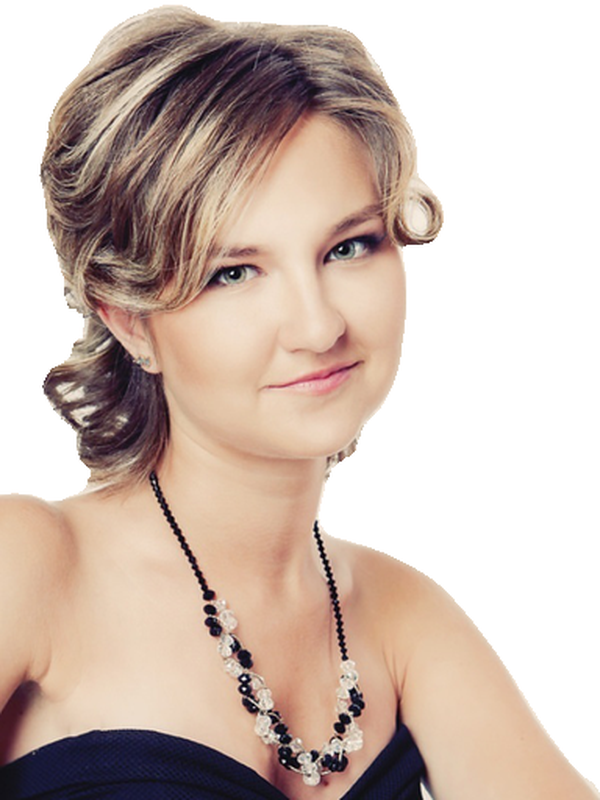

In [5]:
result[0]

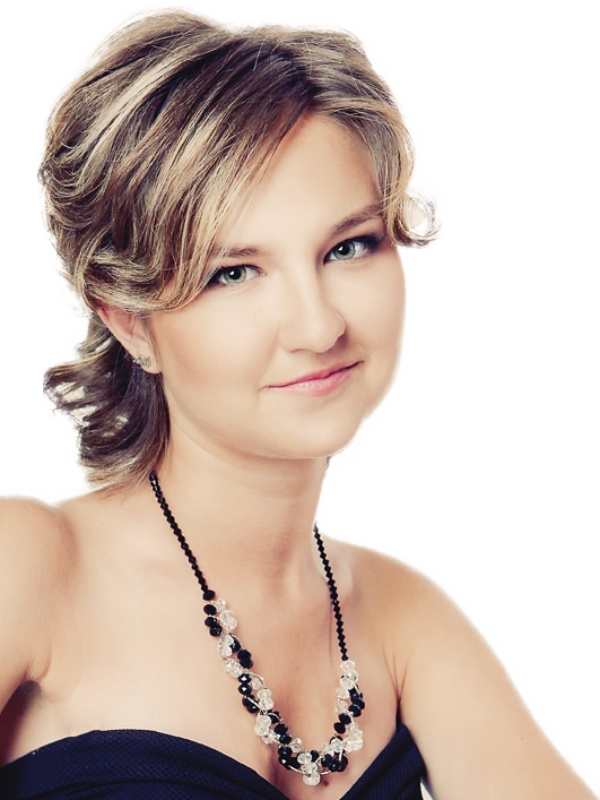

In [6]:
matting